
## Task 3: Weather Forecasting with time-series data

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

The business problem for task 3 is to predict the daily mean temperature for the next 14 days using the time series data ranging from year 2013 to 2017. The predictors in the data are humidity, meantemp, wind_speed and meanpressure. Using these 4 features, a multivariate time series forecasting model is developed using recurrent neural netowork. Various sets of experiments are performed on the number of steps involved in training the model and the results of the prediction are captured. The performance of the model is measured by comparing the mean absolute error of the prediction. The best performing model has number of steps as 12 compared to any other number of steps because the time series plots of the variables show seasonality in the data.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Data preprocessing for the time series analysis requires data loading, data vizualisation and data processing. After loading the dataset, the Date column needs to be set as "index". The date should be continuous (to have continuous plot) and should not miss any date in between. By plotting the time series plot of all the variables, it is evident that there is an yearly pattern (seasonality) in the data. Then the data is split into training and testing sets training set from 2013 to 2016 and testing set is year 2017. The key point after scaling the data are, n_steps = 12, forecasting_horizon = 14, features = 4, y_index = 1. Here, forecasting horizon is 14 because we are predicting for 14 days ahead and features are 4 which are humidity, wind_speed, meantemp and meanpressure. Finally after checking the plot of one training sample, it is observed that humidity has higher values compared to other variables, meantemp, wind_speed,meanpressure.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

In [ ]:
#Importing the Part3_Weather.csv
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
files.upload()

Mounted at /content/drive


Saving Part3_Weather.csv to Part3_Weather.csv


{'Part3_Weather.csv': b'Date,meantemp,humidity,wind_speed,meanpressure\r\n2013-01-01 00:00:00,10,84.5,0,10.15666667\r\n2013-01-02 00:00:00,7.4,92,2.98,10.178\r\n2013-01-03 00:00:00,7.166666667,87,4.633333333,10.18666667\r\n2013-01-04 00:00:00,8.666666667,71.33333333,1.233333333,10.17166667\r\n2013-01-05 00:00:00,6,86.83333333,3.7,10.165\r\n2013-01-06 00:00:00,7,82.8,1.48,10.18\r\n2013-01-07 00:00:00,7,78.6,6.3,10.2\r\n2013-01-08 00:00:00,8.857142857,63.71428571,7.142857143,10.18714286\r\n2013-01-09 00:00:00,14,51.25,12.5,10.17\r\n2013-01-10 00:00:00,11,62,7.4,10.15666667\r\n2013-01-11 00:00:00,15.71428571,51.28571429,10.57142857,10.16142857\r\n2013-01-12 00:00:00,14,74,13.22857143,10.15571429\r\n2013-01-13 00:00:00,15.83333333,75.16666667,4.633333333,10.13333333\r\n2013-01-14 00:00:00,12.83333333,88.16666667,0.616666667,10.15166667\r\n2013-01-15 00:00:00,14.71428571,71.85714286,0.528571429,10.15857143\r\n2013-01-16 00:00:00,13.83333333,86.66666667,0,10.16666667\r\n2013-01-17 00:00:00,1

In [ ]:
data=pd.read_csv('Part3_Weather.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1575 non-null   object 
 1   meantemp      1575 non-null   float64
 2   humidity      1575 non-null   float64
 3   wind_speed    1575 non-null   float64
 4   meanpressure  1575 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.6+ KB


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1575 non-null   datetime64[ns]
 1   meantemp      1575 non-null   float64       
 2   humidity      1575 non-null   float64       
 3   wind_speed    1575 non-null   float64       
 4   meanpressure  1575 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 61.6 KB


In [ ]:
#Setting date column as index
data=data.set_index('Date')

In [ ]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
Date,,,,
2013-01-01,10.000000,84.500000,0.000000,10.156667
2013-01-02,7.400000,92.000000,2.980000,10.178000
2013-01-03,7.166667,87.000000,4.633333,10.186667
2013-01-04,8.666667,71.333333,1.233333,10.171667
2013-01-05,6.000000,86.833333,3.700000,10.165000


In [ ]:
#Rearranging columns, not a mandatory step
data = data[[ 'humidity', 'meantemp', 'wind_speed', 'meanpressure']]

In [ ]:
data.head()

,humidity,meantemp,wind_speed,meanpressure
Date,,,,
2013-01-01,84.500000,10.000000,0.000000,10.156667
2013-01-02,92.000000,7.400000,2.980000,10.178000
2013-01-03,87.000000,7.166667,4.633333,10.186667
2013-01-04,71.333333,8.666667,1.233333,10.171667
2013-01-05,86.833333,6.000000,3.700000,10.165000


Text(0.5, 1.0, 'meanpressure')

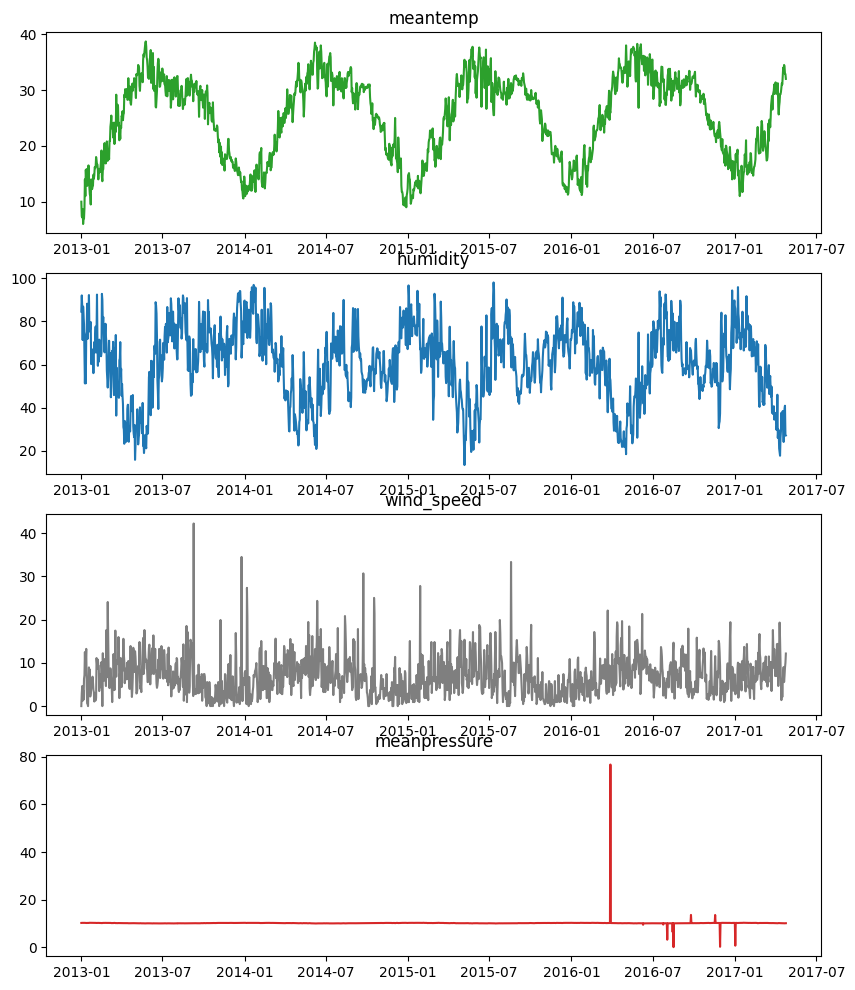

In [ ]:
#Plotting the single line time series plot of the variables
fig, axs = plt.subplots(4, 1,figsize=(10, 12))
axs[0].plot(data['meantemp'],'tab:green')
axs[0].set_title('meantemp')
axs[1].plot(data['humidity'],'tab:blue')
axs[1].set_title('humidity')
axs[2].plot(data['wind_speed'],'tab:grey')
axs[2].set_title('wind_speed')
axs[3].plot(data['meanpressure'],'tab:red')
axs[3].set_title('meanpressure')

In [ ]:
#Defining training and testing sets
tstart = 2013
tend = 2016

def train_test_split(data, tstart, tend):
    train = data.loc[f"{tstart}":f"{tend}"]
    test = data.loc[f"{tend+1}":]
    return train, test
training_set, test_set = train_test_split(data, tstart, tend)

In [ ]:
training_set_shape = training_set.shape
test_set_shape = test_set.shape
print('training_set shape:', training_set_shape)
print('test_set shape:', test_set_shape)

training_set shape: (1461, 4)
test_set shape: (114, 4)


In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.values.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)
print('training_set_scaled shape after scaling:', training_set_scaled.shape)

training_set_scaled shape after scaling: (5844, 1)


In [ ]:
training_set_scaled = training_set_scaled.reshape(training_set_shape[0], training_set_shape[1])
print('training_set_scaled shape:', training_set_scaled.shape)

training_set_scaled shape: (1461, 4)


In [ ]:
def split_sequence(sequence, n_steps,forecasting_horizon, y_index):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - forecasting_horizon:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+forecasting_horizon,y_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
n_steps = 12
forecasting_horizon = 14
features = 4
y_index = 1 # the index of meantemp column
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps,forecasting_horizon,y_index)

In [ ]:
# Reshaping X_train for model
y_train  = y_train.reshape(y_train.shape[0],y_train.shape[1],1)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (1436, 12, 4)
y_train shape: (1436, 14, 1)


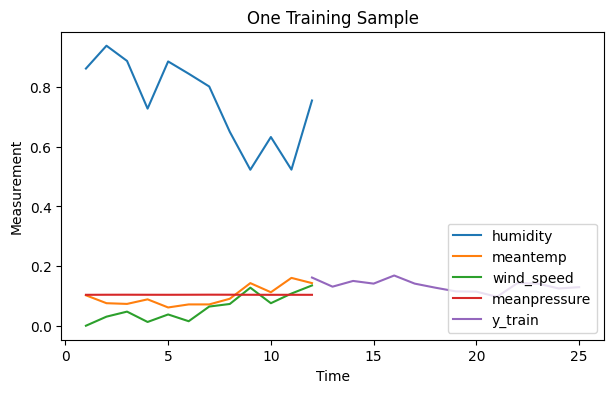

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,0])
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,1])
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,2])
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,3])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),y_train[0])
plt.title('One Training Sample')
plt.ylabel('Measurement')
plt.xlabel('Time')
plt.legend(['humidity','meantemp','wind_speed','meanpressure', 'y_train'], loc='lower right')

<a id = "cell_model"></a>
## 3. Predictive Modeling

For the predictive modelling, LSTM architecture is used with initial layer having 100 units, second layer having 50 units and output layer having 14 units because we are trying to predict for 14 days ahead. Using the RMSprop optimiser, the performance os model is measured with the help of mean absolute error. The number of parameters for the first layer are 42000= 4x(4+100+1)x100, for the second layer which is a dense layer 5050=(100+1)x50, and for the third layer, 714=(50+1)x14. The model is used for prediction and based on the mean absolute error for each forecasting horizon, the performance of the model is evaluated.

In [ ]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=50))
model_lstm.add(Dense(units=14))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               42000     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 14)                714       
                                                                 
Total params: 47,764
Trainable params: 47,764
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
45/45 [==============================] - 5s 22ms/step - loss: 0.0072
Epoch 2/100
45/45 [==============================] - 1s 21ms/step - loss: 0.0017
Epoch 3/100
45/45 [==============================] - 1s 20ms/step - loss: 0.0013
Epoch 4/100
45/45 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 5/100
45/45 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 6/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 7/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 8/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 9/100
45/45 [==============================] - 1s 12ms/step - loss: 9.9569e-04
Epoch 10/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0010
Epoch 11/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 12/100
45/45 [==============================] - 1s 12ms/step - loss: 9.5811e-04
Epoch 13/100
45/4

In [ ]:
#scaling
inputs = test_set.values.reshape(-1, 1)
inputs = sc.transform(inputs)
#Reshape back to orignal format after rescaling
inputs = inputs.reshape(test_set_shape[0], test_set_shape[1])

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps,forecasting_horizon,y_index)
number_test_samples = X_test.shape[0]
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (89, 12, 4)
y_test shape: (89, 14)


In [ ]:
#prediction
predicted_meantemp = model_lstm.predict(X_test)

#inverse transform the predicted values
predicted_meantemp = sc.inverse_transform(predicted_meantemp)
print('predicted_meantemp shape: ', predicted_meantemp.shape)

#inverse transform the test labels.
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
y_test = sc.inverse_transform(y_test)

3/3 [==============================] - 0s 6ms/step
predicted_meantemp shape:  (89, 14)


In [ ]:
def return_mae(test, predicted):
    mae = mean_absolute_error(test, predicted)
    print("Mean Absolute Error {:.2f}.".format(mae))

for i in range(forecasting_horizon):
  print("Forecasting Horizon: {} ".format(i))
  return_mae(y_test[:,i],predicted_meantemp[:,i])
  print("")

Forecasting Horizon: 0 
Mean Absolute Error 1.76.

Forecasting Horizon: 1 
Mean Absolute Error 2.08.

Forecasting Horizon: 2 
Mean Absolute Error 2.25.

Forecasting Horizon: 3 
Mean Absolute Error 2.38.

Forecasting Horizon: 4 
Mean Absolute Error 2.51.

Forecasting Horizon: 5 
Mean Absolute Error 2.62.

Forecasting Horizon: 6 
Mean Absolute Error 2.70.

Forecasting Horizon: 7 
Mean Absolute Error 2.79.

Forecasting Horizon: 8 
Mean Absolute Error 2.86.

Forecasting Horizon: 9 
Mean Absolute Error 2.98.

Forecasting Horizon: 10 
Mean Absolute Error 3.00.

Forecasting Horizon: 11 
Mean Absolute Error 3.02.

Forecasting Horizon: 12 
Mean Absolute Error 3.02.

Forecasting Horizon: 13 
Mean Absolute Error 2.91.



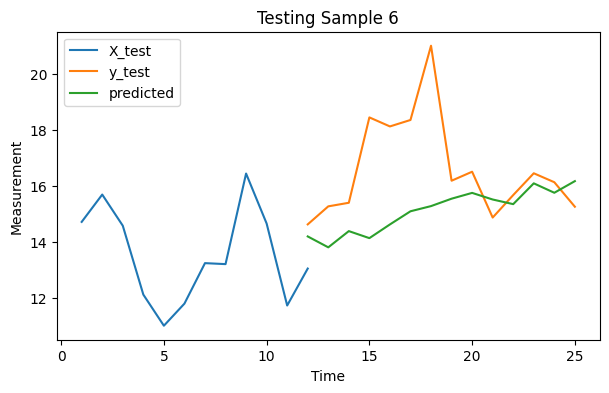

In [ ]:
X_test = X_test.reshape(-1, 12)
X_test = sc.inverse_transform(X_test)
X_test = X_test.reshape(number_test_samples, 12,4)
#Here we visualize the real vs. predicted values of the last testing segment.
sample_index = 6

plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, n_steps+1, 1),X_test[sample_index,:,1])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),y_test[sample_index,:])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),predicted_meantemp[sample_index,:])
plt.title('Testing Sample ' + str(sample_index))
plt.ylabel('Measurement')
plt.xlabel('Time')
plt.legend(['X_test', 'y_test', 'predicted'], loc='upper left')

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Weather mean temperature Prediction")
    plt.xlabel("Days Ahead")
    plt.ylabel("Weather mean temp")
    plt.legend()
    plt.show()

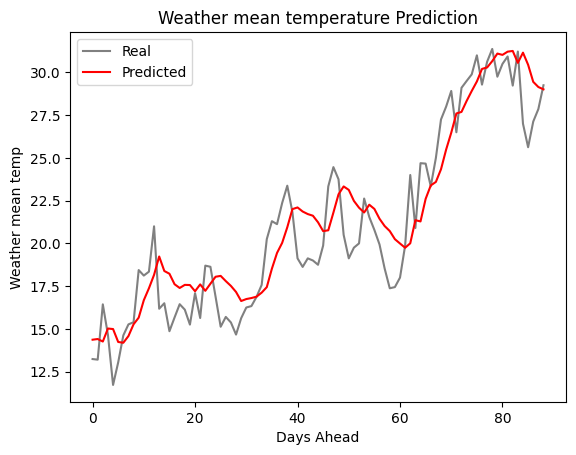

In [ ]:
#Here we visualize the real vs. predicted values for one day forecasting horizon.
plot_predictions(y_test[:,0],predicted_meantemp[:,0])

<a id = "cell_report"></a>
## 4. Experiments Report

Three experiments were performed on the model with the n_steps which are 50,24 and 12. There is a presence of seasonality in the dataset on a yearly basis and thus the best performance comes out with n_steps=12 followed by the performance of the model with n_steps equal to 50 and then 24. Also, it means that the weather is much related and more predictable with the recent past few days data. It is very evident that greater is the forecasting horizon, larger is the mean absolute error for predicting daily mean temperature. For the business, it is not a great approach to predict the weather for the next 14 days because the error increases on each passing day. Or if we include more predictors to the multivariate time series forecasting, we can capture better results with less error related to the mean temperature.